# Segunda parte: Aspectos prácticos de las redes neuronales

En esta segunda parte, vamos a continuar desarrollando el problema de Fashion MNIST, con el objetivo de entender los aspectos prácticos del entrenamiento de redes neuronales que hemos visto en el Tema 4.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. 

In [1]:
# Puedes añadir todos los imports adicionales que necesites aquí
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt

#### Obtención de los datos y pre-processing

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


## Consideraciones iniciales

### Train-validation-test split

En todos los modelos que entrenemos, vamos a partir los datos de training (x_train) en dos sets: training y validación. De este modo, al final tendremos tres datasets distintos: training, validation, y test. Esta es una estrategia común en el aprendizaje automático, en la que los datos de test (o held-out data) se 
"esconden" hasta el final. Los datos de validación se utilizan para estimar cómo de bien están funcionando nuestros modelos y para observar si estamos cayendo en overfitting. Esto nos permite cambiar hiperparámetros y probar distintas arquitecturas **sabiendo que no estamos utilizando información del test set para "optimizar" los resultados en éste** (si eligiéramos nuestro mejor modelo en base a los resultados de test, estaríamos "haciendo trampas", ya que se ha utilizado la información contenida en éste para elegir el modelo y las métricas reportadas serían optimistas).

Para utilizar un split training-validation data durante el entrenamiento, podemos partir nosotros mismos los datos o dejar que Keras lo haga. Podéis ver cómo hacer estas particiones en la documentación de *fit*.

**Requisito: En todos los entrenamientos de esta práctica, se requiere utilizar el 20% de los datos en x_train como  conjunto de datos de validación**

### Un error común con modelos de Keras

En esta práctica entrenaremos varios modelos para comparar resultados. Un error común en Keras es no instanciar un nuevo modelo cada vez que hacemos un nuevo entrenamiento. Al hacer

*model = Sequential()*

*model.add(lo que sea)  # Definición del modelo*

*model.fit()*

si queremos entrenar un nuevo modelo o el mismo modelo otra vez, es necesario volver a inicializar el modelo con model = Sequential(). Si olvidamos este paso y volvemos a hacer fit(), el modelo seguirá entrenando por donde se quedó en el último fit().

### Análisis de resultados 

A la hora de escribir las respuestas y los análisis pedidos, es importante presentar las conclusiones de manera adecuada a partir de lo visto en nuestros experimentos. Los Jupyter Notebook son una herramienta imprescindible para *data scientists* e ingenieros de Machine Learning para presentar los resultados, incluyendo soporte para incluir gráficas y elementos visuales. Podéis explicar vuestras observaciones del modo que consideréis adecuado, si bien recomendamos la utilización de gráficas para evaluar los entrenamientos y comparar resultados.

Como ayuda, las siguientes funciones pueden resultar interesantes a la hora de evaluar resultados. Todas ellas utilizan el objeto *history* que podéis obtener como salida del método *fit()* de Keras:

history = model.fit(x_train, y_train, ...)

Por supuesto, podéis modificarlas y utilizarlas como prefiráis para crear vuestros propios informes.

In [15]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
  
    
def plot_compare_three_losses(history1, history2, history3, name1="Red 1",
                        name2="Red 2", name3="Red 3", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    matplotlib.rcParams['figure.figsize'] = [10, 10]
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.plot(history3.history['loss'], color="red")
    plt.plot(history3.history['val_loss'], 'r--', color="red")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2,
                'Train ' + name3, 'Val ' + name3],
               loc='best')
    plt.show()
  
    
    # 'loss', 'accuracy', 'val_loss', 'val_accuracy'
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()


def plot_compare_three_accs(history1, history2, history3, name1="Red 1",
                      name2="Red 2", name3="Red 3", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    matplotlib.rcParams['figure.figsize'] = [10, 10]
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.plot(history3.history['accuracy'], color="red")
    plt.plot(history3.history['val_accuracy'], 'r--', color="red")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2,
                'Train ' + name3, 'Val ' + name3], 
               loc='best')
    plt.show()


def plot_compare_five_accs(history1, history2, history3, history4, history5, name1="Red 1",
                      name2="Red 2", name3="Red 3",name4="Red 4", name5="Red 5", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    matplotlib.rcParams['figure.figsize'] = [10, 10]
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.plot(history3.history['accuracy'], color="red")
    plt.plot(history3.history['val_accuracy'], 'r--', color="red")
    plt.plot(history4.history['accuracy'], color="black")
    plt.plot(history4.history['val_accuracy'], 'r--', color="black")
    plt.plot(history5.history['accuracy'], color="purple")
    plt.plot(history5.history['val_accuracy'], 'r--', color="purple")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2,
                'Train ' + name3, 'Val ' + name3,
                'Train ' + name4, 'Val ' + name4,
                'Train ' + name5, 'Val ' + name5,
                ], 
               loc='best')
    plt.show()


def plot_compare_five_losses(history1, history2, history3, history4, history5, name1="Red 1",
                        name2="Red 2", name3="Red 3", name4="Red 4", name5="Red 5",title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    matplotlib.rcParams['figure.figsize'] = [10, 10]
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.plot(history3.history['loss'], color="red")
    plt.plot(history3.history['val_loss'], 'r--', color="red")
    plt.plot(history4.history['accuracy'], color="black")
    plt.plot(history4.history['val_accuracy'], 'r--', color="black")
    plt.plot(history5.history['accuracy'], color="purple")
    plt.plot(history5.history['val_accuracy'], 'r--', color="purple")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2,
                'Train ' + name3, 'Val ' + name3,
                'Train ' + name4, 'Val ' + name4,
                'Train ' + name5, 'Val ' + name5,
                ],
               loc='best')
    plt.show()
# Nota: podéis cambiar los números aquí presentes y ejecutar esta línea si queréis cambiar el tamaño
# de las gráficas



## 1. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 1 *(1.25 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [6]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto
"""
Definimos una función para crear el modelo con los siguientes parámetros:
- dense_nodes : Una array cuya longitud nos indicará el numero de capas densas que añadiremos y sus valores el número de nodos de esa capa.
- activation: La función de activación de las hidden layers.
- initializer: El tipo de inilización de los pesos (por defecto glorot_uniform)
- Si añadismos una capa de Dropout en las hidden layers (por defecto a False)
- has_batch_normalization: Si añadimos BatchNormalization (por defecto False)
- loss: La funcion de coste (por defecto sparse_categorical_crossentropy)
- optimizer: El optimizador (por defecto sgd)
- input_shape: El tamaño de la capa de entrada (por defecto 28x28 para este problema)
- output_layer: El tamaño de la capa de salida (numero de clases a predecir por defecto 10).
"""
def create_model(dense_nodes, activation, initializer = 'glorot_uniform', has_dropout = False, dropout_value = 0.2, has_batch_normalization = False, loss='sparse_categorical_crossentropy', optimizer='sgd',
                 input_shape=[28,28], output_layer=10):
    # Comprobamos que el valor de dropout es positivo
    assert dropout_value > 0
    # Comprobamos que tenemos una array de capas ocultas mayor que 0 sus valores también
    assert len(dense_nodes)>0
    assert np.array(dense_nodes).all()>0

    model = Sequential()
    # Capa Flatten de entrada 
    model.add(keras.layers.Flatten(input_shape = input_shape))

    # Hacemos un bucle para añadir las hidden layers
    for i in range(len(dense_nodes)):
        if has_dropout==True:
          model.add(keras.layers.Dropout(dropout_value))
        if has_batch_normalization == True:
          model.add(keras.layers.BatchNormalization())

        model.add(keras.layers.Dense(dense_nodes[i], activation=activation,  kernel_initializer=initializer))
        
    # Añadimos la última capa
    model.add(keras.layers.Dense(output_layer, activation="softmax",  kernel_initializer=initializer))

    model.compile(loss=loss, optimizer=optimizer, metrics =["accuracy"])

    return model


Creamos 3 modelos diferentes para cada función de activación

In [7]:
modelo_relu = create_model(dense_nodes=[256, 128, 64, 32], activation = 'relu' )

modelo_sigmoide = create_model(dense_nodes=[256, 128, 64, 32], activation = 'sigmoid')

modelo_softplus = create_model(dense_nodes=[256, 128, 64, 32], activation = 'softplus')

In [8]:
modelo_relu.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
________________________________________________

In [ ]:
modelo_sigmoide.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
________________________________________________

In [ ]:
modelo_softplus.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
________________________________________________

In [ ]:
# Mediante la función train_test_split seleccionamos un 20% de los datos de entrenamiento para la validación
train_x, val_x, train_y, val_y = train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
train_x.shape

(48000, 28, 28)

In [ ]:
val_x.shape

(12000, 28, 28)

In [ ]:
train_y.shape

(48000,)

In [ ]:
val_y.shape

(12000,)

Entrenamos los modelos

In [ ]:
history_relu = modelo_relu.fit(train_x, train_y, batch_size=64, epochs=20, validation_data=(val_x, val_y), verbose=1)


Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 1.4668 - accuracy: 0.4971 - val_loss: 0.6939 - val_accuracy: 0.7570
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.6259 - accuracy: 0.7753 - val_loss: 0.5610 - val_accuracy: 0.7993
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.5173 - accuracy: 0.8164 - val_loss: 0.4736 - val_accuracy: 0.8372
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.4728 - accuracy: 0.8359 - val_loss: 0.4512 - val_accuracy: 0.8427
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.4497 - accuracy: 0.8402 - val_loss: 0.4696 - val_accuracy: 0.8334
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.4215 - accuracy: 0.8524 - val_loss: 0.4241 - val_accuracy: 0.8528
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.4077 - accuracy: 0.8552 - val_loss: 0.4163 - val_accuracy: 0.8551
Epoch 

In [ ]:
history_sigmoid = modelo_sigmoide.fit(train_x, train_y, batch_size=64, epochs=20, validation_data=(val_x, val_y), verbose=1)


Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 2.3189 - accuracy: 0.0979 - val_loss: 2.3025 - val_accuracy: 0.1012
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 2.3022 - accuracy: 0.1060 - val_loss: 2.3011 - val_accuracy: 0.1019
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 2.3012 - accuracy: 0.1127 - val_loss: 2.3004 - val_accuracy: 0.1039
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 2.3003 - accuracy: 0.1198 - val_loss: 2.2997 - val_accuracy: 0.1609
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 2.2991 - accuracy: 0.1346 - val_loss: 2.2981 - val_accuracy: 0.0938
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 2.2978 - accuracy: 0.1357 - val_loss: 2.2970 - val_accuracy: 0.0984
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 2.2964 - accuracy: 0.1369 - val_loss: 2.2951 - val_accuracy: 0.0996
Epoch 

In [ ]:
history_softplus = modelo_softplus.fit(train_x, train_y, batch_size=64, epochs=20, validation_data=(val_x, val_y), verbose=1)

Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 1.9698 - accuracy: 0.3222 - val_loss: 0.8186 - val_accuracy: 0.7105
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.7790 - accuracy: 0.7157 - val_loss: 0.6799 - val_accuracy: 0.7539
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.6451 - accuracy: 0.7637 - val_loss: 0.6358 - val_accuracy: 0.7538
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.5966 - accuracy: 0.7856 - val_loss: 0.5328 - val_accuracy: 0.8159
Epoch 5/20
750/750 [==============================] - 4s 6ms/step - loss: 0.5455 - accuracy: 0.8056 - val_loss: 0.5112 - val_accuracy: 0.8216
Epoch 6/20
750/750 [==============================] - 4s 6ms/step - loss: 0.5214 - accuracy: 0.8121 - val_loss: 0.5383 - val_accuracy: 0.8093
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.4980 - accuracy: 0.8216 - val_loss: 0.4815 - val_accuracy: 0.8310
Epoch 

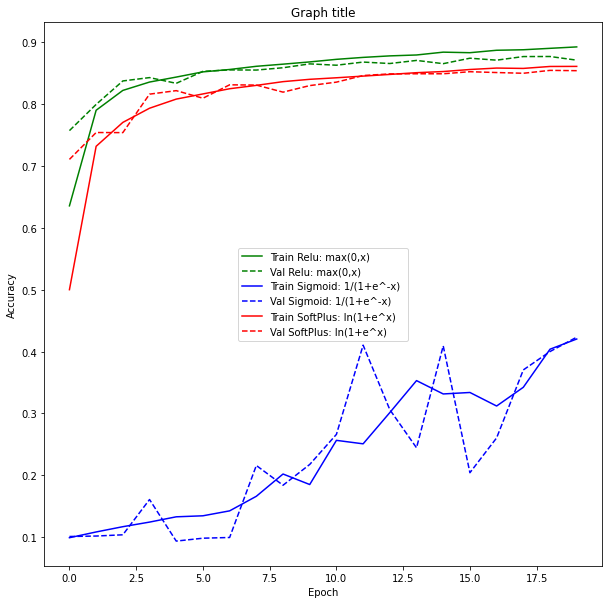

In [ ]:
plot_compare_three_accs(history_relu, history_sigmoid, history_softplus,  name1='Relu: max(0,x)', name2='Sigmoid: 1/(1+e^-x) ', name3='SoftPlus: ln(1+e^x)')

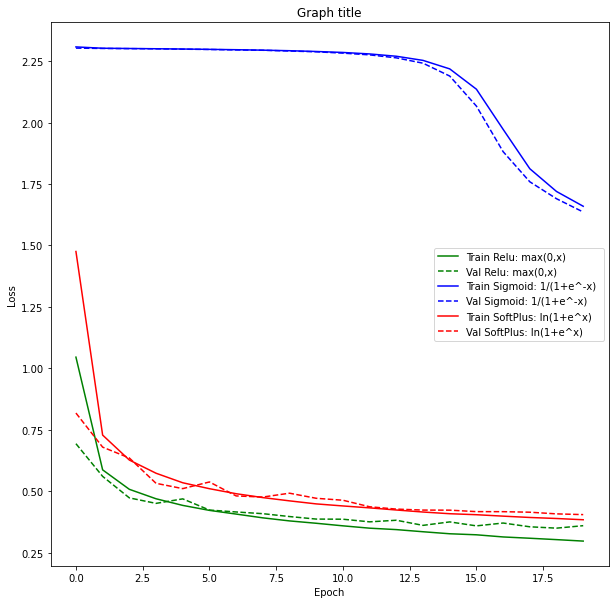

In [ ]:
plot_compare_three_losses(history_relu, history_sigmoid, history_softplus, name1='Relu: max(0,x)', name2='Sigmoid: 1/(1+e^-x) ', name3='SoftPlus: ln(1+e^x)')

Como podemos observar la función de activación Relu y Softpus tiene un accuracy mucho mejor que la función Sigmoide. Como hemos visto en teoria, esto es debido a que las unidades sigmoide matan a los gradientes debido a que valores altos negativos o positivos caen en la zona en la cual pendiente de la función es 0 y por lo tanto, el gradiente toma valores cercanos a 0. En referencia a las diferencias observadas entre la función de activación Softplus y Relu, intuitivamente se podría pensar que softplus al ser una versión suavizada de Relu se obtendrían mejores resultados pues es diferenciable en todos los puntos. No obstante, empíricamente parece no ser así (Goodfellow et. al, 2016). Por otro lado, Relu es más eficiente computacionalmente ya que es muy fácil de calcular debido a que no tiene exoponenciales. 

## 2. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 2 *(1.25 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [9]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

train_x, val_x, train_y, val_y = train_test_split(x_train, y_train, test_size=0.2)

In [10]:
model_with_zeros =  create_model(dense_nodes=[256, 128, 64, 32], activation = 'relu', initializer = keras.initializers.Zeros())
model_with_normal =  create_model(dense_nodes=[256, 128, 64, 32], activation = 'relu', initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None))
model_glorot = create_model(dense_nodes=[256, 128, 64, 32], activation = 'relu', initializer = 'glorot_uniform' )


In [11]:
history_with_zeros = model_with_zeros.fit(train_x, train_y, batch_size=64, epochs=20, validation_data=(val_x, val_y), verbose=1)


Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 2.3026 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.0972
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 2.3026 - accuracy: 0.1024 - val_loss: 2.3027 - val_accuracy: 0.0972
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 2.3026 - accuracy: 0.0964 - val_loss: 2.3027 - val_accuracy: 0.0972
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.0978
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.0972
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 2.3026 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.0972
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 2.3026 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.0972
Epoch 

In [12]:
history_with_normal = model_with_normal.fit(train_x, train_y, batch_size=64, epochs=20, validation_data=(val_x, val_y), verbose=1)


Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 1.6434 - accuracy: 0.4481 - val_loss: 0.7263 - val_accuracy: 0.7513
Epoch 2/20
750/750 [==============================] - 3s 5ms/step - loss: 0.6721 - accuracy: 0.7634 - val_loss: 0.5753 - val_accuracy: 0.8066
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5569 - accuracy: 0.8038 - val_loss: 0.5436 - val_accuracy: 0.8101
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5169 - accuracy: 0.8181 - val_loss: 0.4904 - val_accuracy: 0.8279
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4871 - accuracy: 0.8269 - val_loss: 0.4728 - val_accuracy: 0.8343
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4523 - accuracy: 0.8392 - val_loss: 0.4621 - val_accuracy: 0.8337
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4331 - accuracy: 0.8458 - val_loss: 0.4347 - val_accuracy: 0.8469
Epoch 

In [13]:
history_with_glorot = model_glorot.fit(train_x, train_y, batch_size=64, epochs=20, validation_data=(val_x, val_y), verbose=1)


Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 1.3794 - accuracy: 0.5531 - val_loss: 0.6305 - val_accuracy: 0.7768
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5943 - accuracy: 0.7900 - val_loss: 0.5129 - val_accuracy: 0.8202
Epoch 3/20
750/750 [==============================] - 3s 5ms/step - loss: 0.5029 - accuracy: 0.8255 - val_loss: 0.4752 - val_accuracy: 0.8348
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4629 - accuracy: 0.8374 - val_loss: 0.4451 - val_accuracy: 0.8444
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4361 - accuracy: 0.8472 - val_loss: 0.4457 - val_accuracy: 0.8456
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4194 - accuracy: 0.8541 - val_loss: 0.4224 - val_accuracy: 0.8505
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3965 - accuracy: 0.8593 - val_loss: 0.4024 - val_accuracy: 0.8590
Epoch 

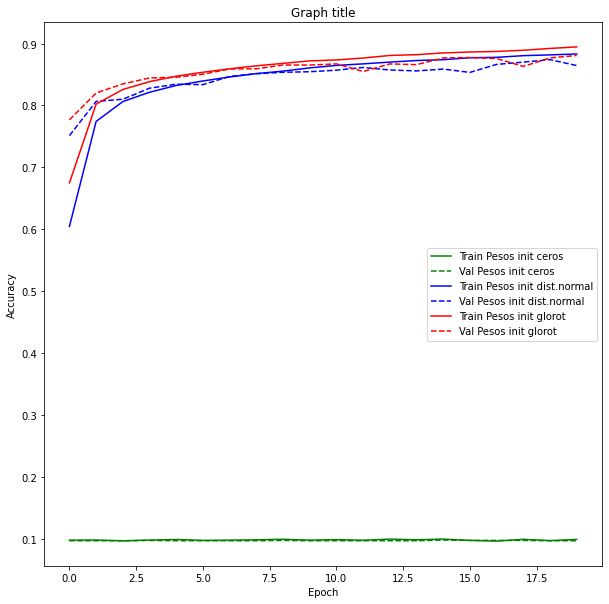

In [16]:
plot_compare_three_accs(history_with_zeros, history_with_normal,history_with_glorot, "Pesos init ceros", "Pesos init dist.normal","Pesos init glorot")

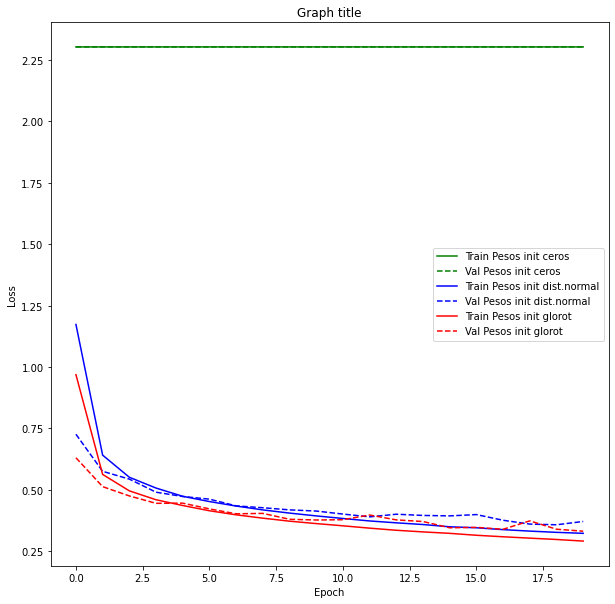

In [17]:
plot_compare_three_losses(history_with_zeros, history_with_normal,history_with_glorot, "Pesos init ceros", "Pesos init dist.normal","Pesos init glorot")

Como podemos observar la inicialización a 0 de los pesos no permite el entrenamiento de la red, ya que como hemos visto en teoria provocamos una simetría que se propague el 0 y no pueda aprender.
Por otro lado, tanto la inicialización con una distribución normal como con la glorot dan buenos resultados, aunque la inicialización mediante glorot uniform es ligerament mejor. No obstante, para que en la distribución normal se obtengan buenos resultados es necesario que la desviación estándard no sea demasiado pequeña ni demasiado grande. Si probamos con un valor muy cercano a 0 no nos alejaríamos mucho de la media y tendríamos el mismo problema de desvanecimiento de gradientes que con la inicialización a 0. Por otro lado, si es demasiado grande los gradientes dejan de tener valores cercanos a 0 a costa de que las funciones de activación quedan prácticamente binarias. En este post podemos ver las gráficas de gradientes y las funciones de activación para diferentes inicializaciones donde se corrobora lo mencionado https://towardsdatascience.com/hyper-parameters-in-action-part-ii-weight-initializers-35aee1a28404

 Por otro lado, si utilizamos la dist normal con la misma desviación estándard pero cambiamos la función de activación a la tanh los resultados se igualan con la inicialización de glorot uniform tal y como se menciona en el artículo. 

## 3. Optimizadores

**Ejercicio 3 *(1.25 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [18]:
modelo_adam = create_model(dense_nodes=[256, 128, 64, 32], activation = 'relu', optimizer='adam')
modelo_RMSprop = create_model(dense_nodes=[256, 128, 64, 32], activation = 'relu', optimizer='RMSprop' )
modelo_sgd = create_model(dense_nodes=[256, 128, 64, 32], activation = 'relu', optimizer='sgd' )
modelo_sgd_momentum = create_model(dense_nodes=[256, 128, 64, 32], activation = 'relu', optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.9))
modelo_sgd_nesterov = create_model(dense_nodes=[256, 128, 64, 32], activation = 'relu', optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, nesterov=True))

In [ ]:
history_with_sgd = modelo_sgd.fit(train_x, train_y, batch_size=64, epochs=20, validation_data=(val_x, val_y), verbose=1)


Epoch 1/20
750/750 [==============================] - 3s 4ms/step - loss: 1.4099 - accuracy: 0.5333 - val_loss: 0.6161 - val_accuracy: 0.7797
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5950 - accuracy: 0.7868 - val_loss: 0.5078 - val_accuracy: 0.8237
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5120 - accuracy: 0.8190 - val_loss: 0.4902 - val_accuracy: 0.8238
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4676 - accuracy: 0.8363 - val_loss: 0.4463 - val_accuracy: 0.8421
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4429 - accuracy: 0.8457 - val_loss: 0.4208 - val_accuracy: 0.8501
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4203 - accuracy: 0.8504 - val_loss: 0.4324 - val_accuracy: 0.8457
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4061 - accuracy: 0.8573 - val_loss: 0.3989 - val_accuracy: 0.8594
Epoch 

In [ ]:
history_with_adam = modelo_adam.fit(train_x, train_y, batch_size=64, epochs=20, validation_data=(val_x, val_y), verbose=1)


Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 0.7527 - accuracy: 0.7361 - val_loss: 0.4128 - val_accuracy: 0.8504
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3928 - accuracy: 0.8565 - val_loss: 0.3733 - val_accuracy: 0.8653
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3521 - accuracy: 0.8691 - val_loss: 0.3604 - val_accuracy: 0.8654
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3199 - accuracy: 0.8832 - val_loss: 0.3438 - val_accuracy: 0.8734
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2966 - accuracy: 0.8907 - val_loss: 0.3424 - val_accuracy: 0.8733
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2872 - accuracy: 0.8931 - val_loss: 0.3037 - val_accuracy: 0.8920
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2685 - accuracy: 0.8978 - val_loss: 0.3192 - val_accuracy: 0.8853
Epoch 

In [ ]:
history_with_RMSprop = modelo_RMSprop.fit(train_x, train_y, batch_size=64, epochs=20, validation_data=(val_x, val_y), verbose=1)


Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2563 - accuracy: 0.9105 - val_loss: 0.5435 - val_accuracy: 0.8915
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2548 - accuracy: 0.9117 - val_loss: 0.5430 - val_accuracy: 0.8916
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2490 - accuracy: 0.9135 - val_loss: 0.5703 - val_accuracy: 0.8691
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2516 - accuracy: 0.9112 - val_loss: 0.4734 - val_accuracy: 0.8868
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2512 - accuracy: 0.9131 - val_loss: 0.4670 - val_accuracy: 0.8875
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2489 - accuracy: 0.9131 - val_loss: 0.5440 - val_accuracy: 0.8936
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2528 - accuracy: 0.9156 - val_loss: 0.6639 - val_accuracy: 0.8904
Epoch 

In [ ]:
history_sgd_momentum = modelo_sgd_momentum.fit(train_x, train_y, batch_size=64, epochs=20, validation_data=(val_x, val_y), verbose=1)

Epoch 1/20
750/750 [==============================] - 3s 4ms/step - loss: 1.0232 - accuracy: 0.6174 - val_loss: 0.5104 - val_accuracy: 0.8248
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5653 - accuracy: 0.8005 - val_loss: 0.5002 - val_accuracy: 0.8325
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5113 - accuracy: 0.8218 - val_loss: 0.4477 - val_accuracy: 0.8408
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4821 - accuracy: 0.8321 - val_loss: 0.4877 - val_accuracy: 0.8236
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4611 - accuracy: 0.8414 - val_loss: 0.4886 - val_accuracy: 0.8343
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4333 - accuracy: 0.8497 - val_loss: 0.4577 - val_accuracy: 0.8561
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4163 - accuracy: 0.8579 - val_loss: 0.4229 - val_accuracy: 0.8573
Epoch 

In [ ]:
history_sgd_nesterov = modelo_sgd_nesterov.fit(train_x, train_y, batch_size=64, epochs=20, validation_data=(val_x, val_y), verbose=1)

Epoch 1/20
750/750 [==============================] - 3s 4ms/step - loss: 0.9245 - accuracy: 0.6654 - val_loss: 0.4545 - val_accuracy: 0.8371
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4412 - accuracy: 0.8377 - val_loss: 0.3844 - val_accuracy: 0.8593
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3825 - accuracy: 0.8577 - val_loss: 0.3685 - val_accuracy: 0.8639
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3438 - accuracy: 0.8721 - val_loss: 0.3488 - val_accuracy: 0.8734
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3235 - accuracy: 0.8794 - val_loss: 0.3647 - val_accuracy: 0.8632
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3073 - accuracy: 0.8863 - val_loss: 0.3287 - val_accuracy: 0.8777
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2914 - accuracy: 0.8918 - val_loss: 0.3722 - val_accuracy: 0.8611
Epoch 

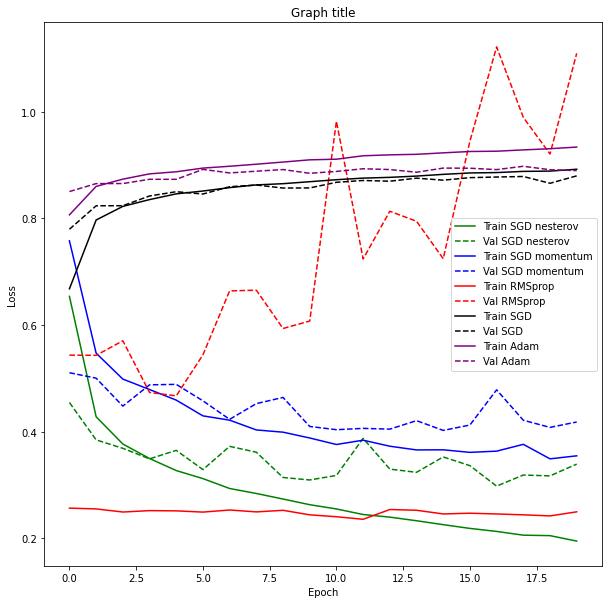

In [ ]:
plot_compare_five_losses(history_sgd_nesterov, history_sgd_momentum,history_with_RMSprop, history_with_sgd,history_with_adam,"SGD nesterov", "SGD momentum","RMSprop", "SGD", "Adam")

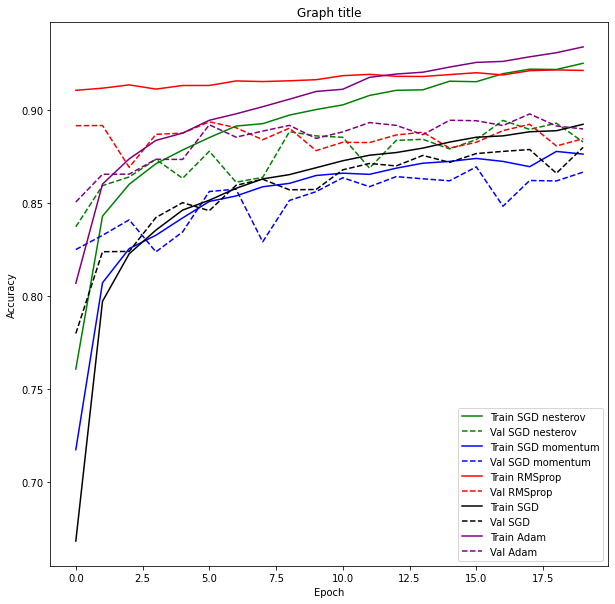

In [ ]:
plot_compare_five_accs(history_sgd_nesterov, history_sgd_momentum,history_with_RMSprop, history_with_sgd,history_with_adam,"SGD nesterov", "SGD momentum","RMSprop", "SGD", "Adam")

Como podemos ver apenas hay diferencias entre los resultados obtenidos por los diferentes optimizadores. Aunque SGD es posible tunearlo añadiendo un momento y cambiando el leaning rate se obtienen resultados muy parecidos. De teoria sabemos que el momentum ayuda a no caer en mínimos locales y ayuda a converger más rápido a la solución. Respecto a las diferencias entre usar nesterov y el momentum clásico en teoría nesterov es una versión mejorada de el momentum clásico ya que primero da el paso en la dirección y luego corrige la velocidad (y en el clásico es al revés) pero en este caso no se aprecia gran diferencia quizas porque es un problema muy sencillo.

Por otro lado, respecto el resto de optimizadores Adam también implementa una versión del momentum al igual que RMSprop aunque la diferencia con SGD recae en el cálculo de los gradientes. 


## 4. Regularización y red final *(1.25 puntos)*

**Ejercicio 4.1**: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [19]:
## Tu modelo y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

model_final = create_model(dense_nodes=[128,64, 32], activation = 'relu', has_dropout = True, has_batch_normalization=True, initializer = 'glorot_uniform',optimizer='adam' )

In [20]:
model_final.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_70 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_71 (Dense)             (None, 64)              

In [21]:
es =keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history_model_final = model_final.fit(train_x, train_y, batch_size=64, epochs=4000, validation_data=(val_x, val_y), verbose=1, callbacks=[es])


Epoch 1/4000
750/750 [==============================] - 5s 5ms/step - loss: 0.9415 - accuracy: 0.6822 - val_loss: 0.4112 - val_accuracy: 0.8530
Epoch 2/4000
750/750 [==============================] - 4s 5ms/step - loss: 0.5060 - accuracy: 0.8181 - val_loss: 0.3798 - val_accuracy: 0.8608
Epoch 3/4000
750/750 [==============================] - 4s 5ms/step - loss: 0.4520 - accuracy: 0.8313 - val_loss: 0.3598 - val_accuracy: 0.8665
Epoch 4/4000
750/750 [==============================] - 4s 5ms/step - loss: 0.4298 - accuracy: 0.8416 - val_loss: 0.3485 - val_accuracy: 0.8698
Epoch 5/4000
750/750 [==============================] - 4s 5ms/step - loss: 0.4146 - accuracy: 0.8460 - val_loss: 0.3343 - val_accuracy: 0.8763
Epoch 6/4000
750/750 [==============================] - 4s 5ms/step - loss: 0.4039 - accuracy: 0.8526 - val_loss: 0.3299 - val_accuracy: 0.8790
Epoch 7/4000
750/750 [==============================] - 4s 5ms/step - loss: 0.3881 - accuracy: 0.8550 - val_loss: 0.3241 - val_accuracy:

Se ha seguido una estrategia bottom up, es decir, aunque partiamos de buenos resultados para 4 capas en los apartados anteriores, se ha empezado des de una aqruitectura más simple (solo una capa con 10 neuronas) y se ha ido subiendo el número de capas y el número de neuronas para ver si se apreciaban deiferencias significativas. Hasta que no se ha subido a dos capas de 64 neuronas el modelo no superaba el 70% en accuracy.
Después se ha contrastado cambiando el optimizador. A nivel de optimizador y tal como se ha comentado antes, no se han observado diferencias significativas entre los diversos tipos. 
Añadiendo batch normalizacion si que se apreciaba una subida de un 3-4% en los datos de entrenamiento, aunque causaba un poco de overfitting que añadiendo las capas de droput se ha solventado.
Por otro lado, aparte se ha probado con la regularización L1 y L2 (para no añadir más parámetros a la función que se ha utilizado durante el ejercicio). No obstante, el resultado era bastante peor y no se superaba el 83% de accuracy.

Por otro lado, se ha añadido early stopping con loss y se ha visto que solo con 9 epoch el modelo ya paraba.

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=1e-3, l2=1e-2)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=1e-3, l2=1e-2)),
    keras.layers.Dense(32, activation='softmax')
])

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
hist = model.fit(train_x, train_y, batch_size=64, epochs=20, validation_data=(val_x, val_y), verbose=1)

Epoch 1/20
750/750 [==============================] - 3s 4ms/step - loss: 3.4784 - accuracy: 0.6937 - val_loss: 1.1253 - val_accuracy: 0.7832
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 1.0547 - accuracy: 0.7825 - val_loss: 0.9278 - val_accuracy: 0.7960
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.9017 - accuracy: 0.7968 - val_loss: 0.8643 - val_accuracy: 0.8033
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.8333 - accuracy: 0.8045 - val_loss: 0.8177 - val_accuracy: 0.7945
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.7938 - accuracy: 0.8085 - val_loss: 0.7604 - val_accuracy: 0.8188
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.7622 - accuracy: 0.8149 - val_loss: 0.7863 - val_accuracy: 0.7878
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.7513 - accuracy: 0.8107 - val_loss: 0.7320 - val_accuracy: 0.8195
Epoch 

### Evaluación del modelo en datos de test

Una vez elegido el que creemos que es nuestro mejor modelo a partir de la estimación que hemos visto en los datos de validación, es hora de utilizar los datos de test para ver cómo se comporta nuestro modelo ante nuevos datos. Si hemos hecho bien las cosas, este número debería ser parecido al valor de nuestra estimación vista en los datos de validación.

**Pregunta 4.2**. Utilizando nuestro mejor modelo, obtener la accuracy resultante en el dataset de test. Comentar este resultado.

In [ ]:
## Tu código y comentarios de texto aquí

loss, accuracy = model_final.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.3222 - accuracy: 0.8861


Como se puede ver el resultado se acerca al 90% aunque no llega. Si usaramos una red convolucional probablemente pordríamos alcanzar una capacidad predictiva mucho mayor, ya que para una red fully connected quizás el aprendizaje se hace más dificil para las imágenes. 

# Bibliografia

Section 6.3.3 of the Deep Learning book. Goodfellow et. al, 2016
Hyper-parameters in Action! Part II — Weight Initializers. Godoy, 2018
https://towardsdatascience.com/hyper-parameters-in-action-part-ii-weight-initializers-35aee1a28404

https://towardsdatascience.com/a-look-at-gradient-descent-and-rmsprop-optimizers-f77d483ef08b

https://stats.stackexchange.com/questions/179915/whats-the-difference-between-momentum-based-gradient-descent-and-nesterovs-acc#:~:text=The%20main%20difference%20is%20in,new%20location%20(then%20repeat)